In [103]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("PySpark Notebook") \
    .getOrCreate()


In [104]:
data = spark.read.option("header",True).csv("D:\JAVA\MarketingAnalysisProject2\Inputfile\InputFile.csv")


In [105]:
data.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may

In [106]:
    data.createOrReplaceTempView("mytable")
    

In [107]:
successDF = spark.sql("SELECT count(*) AS successCount FROM mytable WHERE poutcome = 'success'")

In [108]:
failureDF = spark.sql("SELECT count(*) AS successCount FROM mytable WHERE poutcome = 'failure'")

In [109]:
successDF.show()

+------------+
|successCount|
+------------+
|        1511|
+------------+



In [110]:
numDF = spark.sql("SELECT count(*) AS totalCount FROM mytable")

In [111]:
numDF.show()

+----------+
|totalCount|
+----------+
|     45211|
+----------+



In [112]:
row1 = numDF.collect()[0]

In [113]:
value1 = row1["totalCount"]

In [114]:
rows = successDF.collect()
first_row = rows[0]


In [115]:
value = first_row["successCount"]

In [116]:
row2 = failureDF.collect()[0]

In [117]:
value2 = first_row = rows[0][0]

In [118]:
print(successCount)

[Row(successCount=1511)]


In [119]:
totalCount = numDF.first()

In [120]:
print(totalCount)

Row(totalCount=45211)


In [121]:
MarketingSuccessRate = value/value1

In [122]:
print(MarketingSuccessRate)

0.0334210700935613


In [123]:
marketingFailureRate = value2/ value1

In [124]:
print(marketingFailureRate)

0.0334210700935613


In [125]:
from pyspark.sql.functions import avg, min, max


avg_age = data.select(avg("age")).collect()[0][0]
min_age = data.select(min("age")).collect()[0][0]
max_age = data.select(max("age")).collect()[0][0]


print("avg: ", avg_age)
print("min: ", min_age)
print("max: ", max_age)

avg:  40.93621021432837
min:  18
max:  95


In [126]:
 age  = spark.sql("select age , count(*) as number from mytable where y = 'yes' group by age order by number desc").show()



+---+------+
|age|number|
+---+------+
| 32|   221|
| 30|   217|
| 33|   210|
| 35|   209|
| 31|   206|
| 34|   198|
| 36|   195|
| 29|   171|
| 37|   170|
| 28|   162|
| 38|   144|
| 39|   143|
| 27|   141|
| 26|   134|
| 41|   120|
| 46|   118|
| 40|   116|
| 47|   113|
| 25|   113|
| 42|   111|
+---+------+
only showing top 20 rows



In [127]:
marital = spark.sql("select marital, count(*) as number from mytable where y='yes' group by marital order by number desc ").show()


+--------+------+
| marital|number|
+--------+------+
| married|  2755|
|  single|  1912|
|divorced|   622|
+--------+------+



In [128]:
age_marital = spark.sql("select age, marital, count(*) as number from mytable where y='yes' group by age,marital order by number desc ").show()


+---+-------+------+
|age|marital|number|
+---+-------+------+
| 30| single|   151|
| 28| single|   138|
| 29| single|   133|
| 32| single|   124|
| 26| single|   121|
| 34|married|   118|
| 31| single|   111|
| 27| single|   110|
| 35|married|   101|
| 36|married|   100|
| 25| single|    99|
| 37|married|    98|
| 33|married|    97|
| 33| single|    97|
| 32|married|    87|
| 39|married|    87|
| 38|married|    86|
| 35| single|    84|
| 47|married|    83|
| 46|married|    80|
+---+-------+------+
only showing top 20 rows



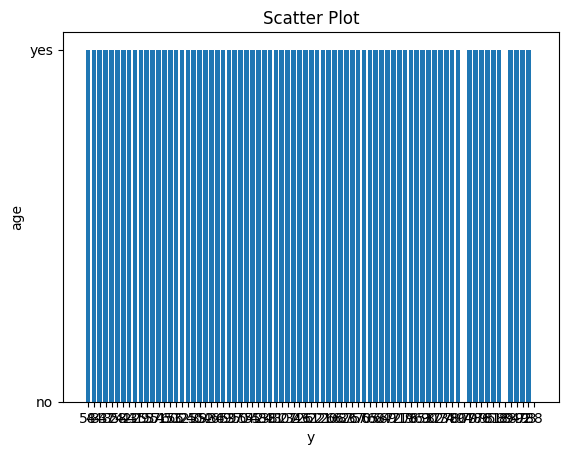

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

age_series = data.select("age").toPandas()["age"]
y_series = data.select("y").toPandas()["y"]

plt.bar(age_series, y_series)
plt.title("Scatter Plot")
plt.xlabel('y')
plt.ylabel('age')
plt.show()

In [130]:
spark.sql("SELECT AVG(balance) AS average_balance FROM mytable").show()


+------------------+
|   average_balance|
+------------------+
|1362.2720576850766|
+------------------+

